Goal of this notebook:

Explore Random Forest (XGBoost) hyperparameters to find the best common combination among all projects.

Outputs: 
- Validation curves for each hyperparameter
- Best combination of Random Forest (XGBoost) hyperparameters

In [2]:
import numpy as np
import pandas as pd
from IPython.core.display import display
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
from xgboost import XGBRFClassifier
import warnings
import classifier_utils
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
import math

In [3]:
non_features_columns = ["chunk_id", "line_start", "line_end", "line_separator", "kind_conflict", "url", "project"]
non_features_columns.extend(["project_user", "project_name", "path", "file_name", "sha", "leftsha", "rightsha", "basesha"])

In [4]:
selected_dataset = pd.read_csv("../../data/SELECTED_LABELLED_DATASET.csv")
projects = list(selected_dataset['project'].unique())

In [5]:
df_training = pd.read_csv("../../data/dataset-training.csv")
target_names = sorted(list(df_training['developerdecision'].unique()))
df_na = df_training[df_training.isna().any(axis=1)]

len(df_na) / len(df_training)

0.28144947636066214

### Base classifier

In [6]:
rf_xg = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss')

In [7]:
result_rf_xg = classifier_utils.ProjectsResults(rf_xg, projects, non_features_columns, drop_na=False)

In [8]:
report_rf_xg = result_rf_xg.get_report_df(include_overall=True)
report_rf_xg

,project,observations,observations (wt NaN),precision,recall,f1-score,accuracy,baseline (majority),improvement
0,CCI-MIT__XCoLab,5512,5512,0.968000,0.975000,0.972000,0.975000,0.454000,0.95400
1,apache__directory-server,845,845,0.917000,0.920000,0.918000,0.920000,0.515000,0.83400
2,jgralab__jgralab,2072,2072,0.798000,0.804000,0.797000,0.804000,0.480000,0.62300
3,Unidata__thredds,1154,1154,0.897000,0.905000,0.895000,0.905000,0.775000,0.57700
4,getrailo__railo,815,815,0.745000,0.762000,0.752000,0.762000,0.459000,0.56000
5,apache__accumulo,4113,4113,0.834000,0.850000,0.838000,0.850000,0.687000,0.52100
6,TeamDev-Ltd__OpenFaces,2979,2979,0.958000,0.962000,0.960000,0.962000,0.924000,0.50200
7,Ramblurr__Anki-Android,892,892,0.673000,0.705000,0.686000,0.705000,0.436000,0.47700
8,CloudStack-extras__CloudStack-archive,1424,1424,0.695000,0.706000,0.693000,0.706000,0.453000,0.46200
9,cgjones__android-frameworks-base,828,828,0.856000,0.867000,0.860000,0.867000,0.771000,0.42100


In [ ]:
result_rf_xg.get_accuracy_per_class_df(target_names, include_overall=True)

### Validation curves

- n_estimators (default 100) -> [80, 100, 200, 300, 400]
- colsample_bynode (relative number of features used at each split point 0 to 1.0) -> 0.0 to 1.0 with .1 step

##### n_estimators

n_estimators : int, default=100

The number of trees in the forest.

### Overall

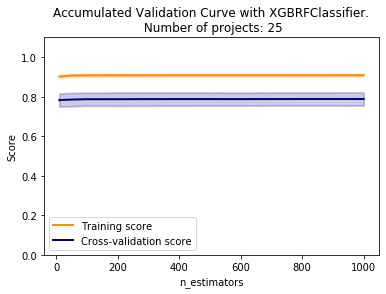

In [9]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf_xg, 'n_estimators',
                                        [10,50,100,200,400,600,800,1000],
                                        non_features_columns)

### Per project

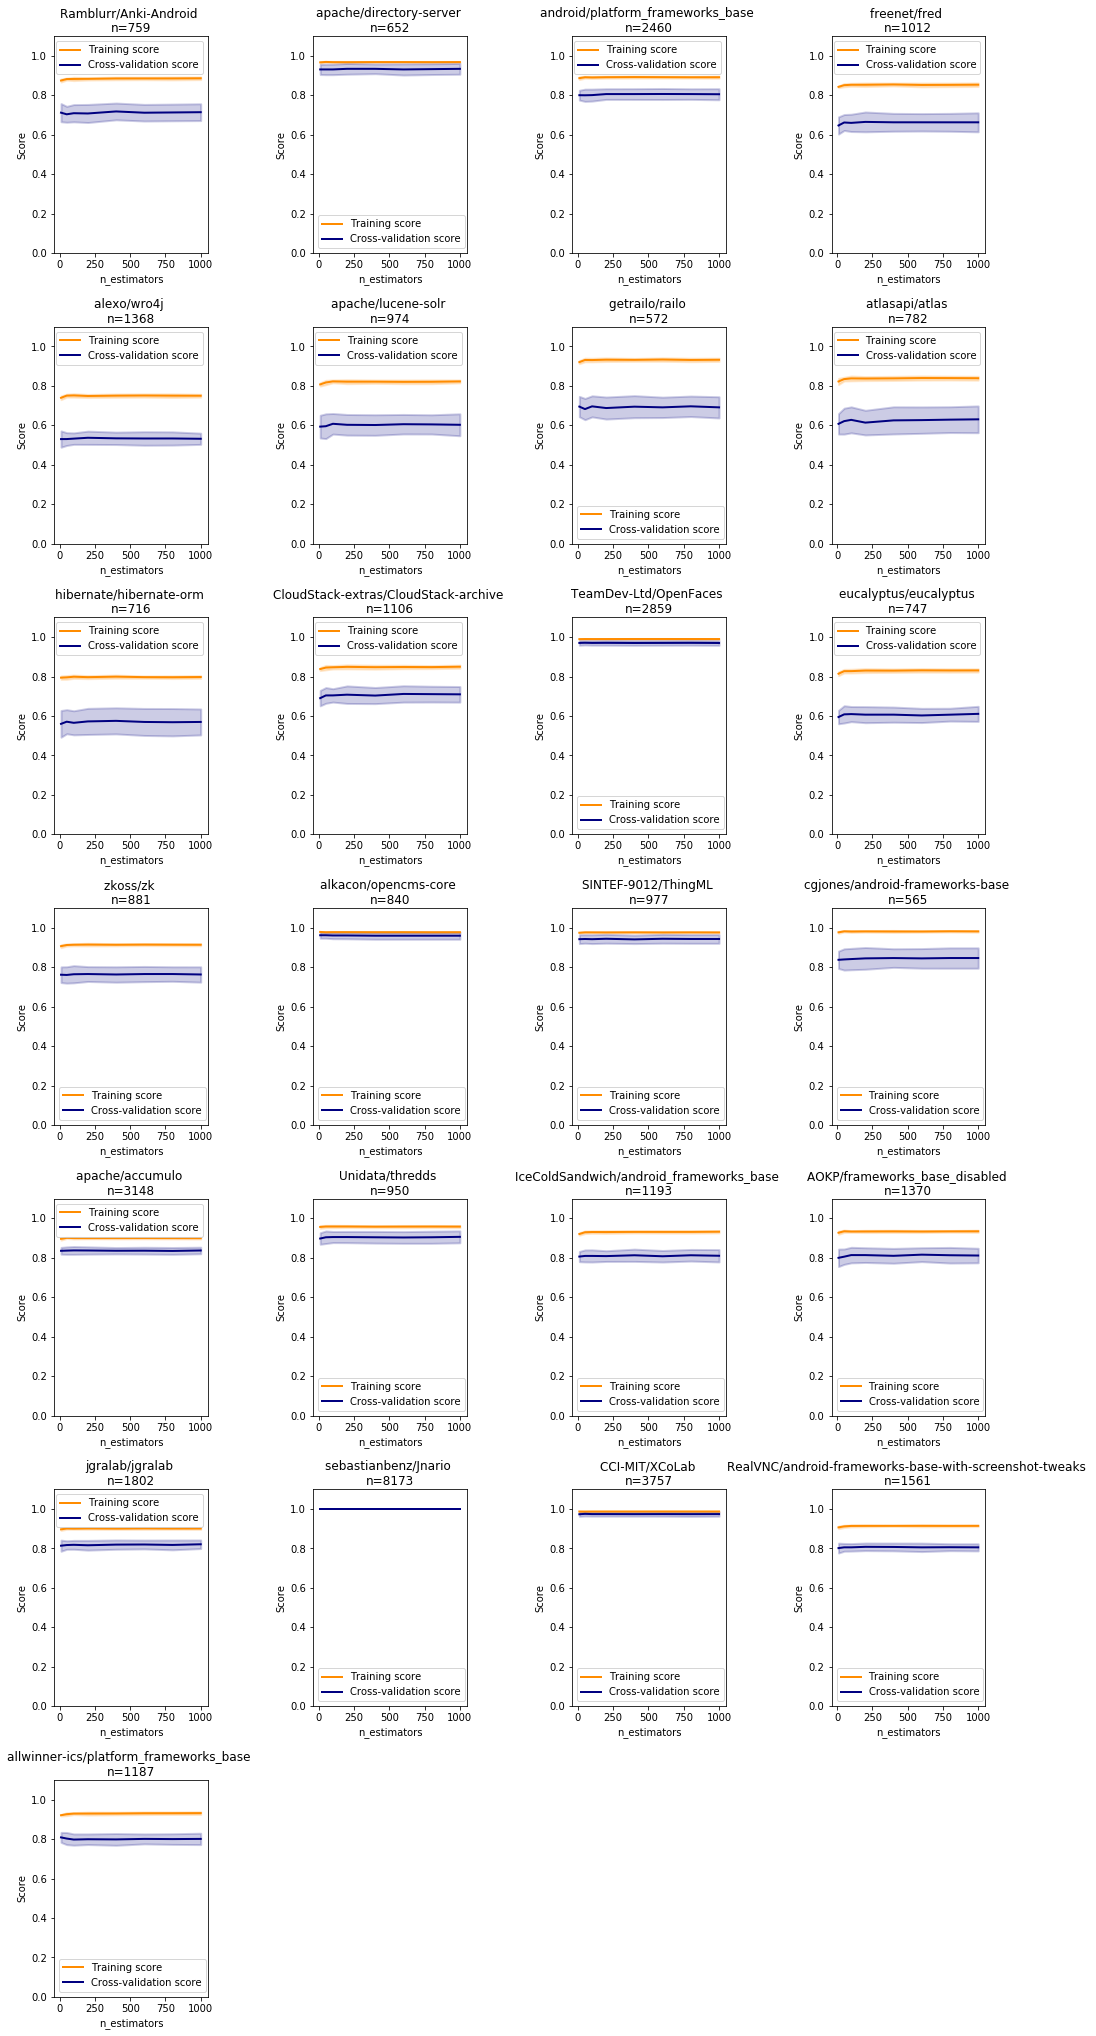

In [10]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf_xg, 'n_estimators',
                                        [10,50,100,200,400,600,800,1000],
                                        non_features_columns)

#### colsample_bynode

colsample_bynode : float, default=0.8

relative number of features used at each split point 0 to 1.0

### Overall

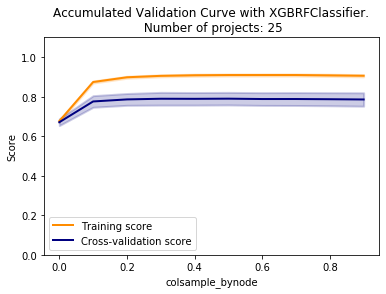

In [12]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.get_validation_curve_all(projects, rf_xg, 'colsample_bynode',
                                        np.arange(0,1,0.1),
                                        non_features_columns)

### Per project

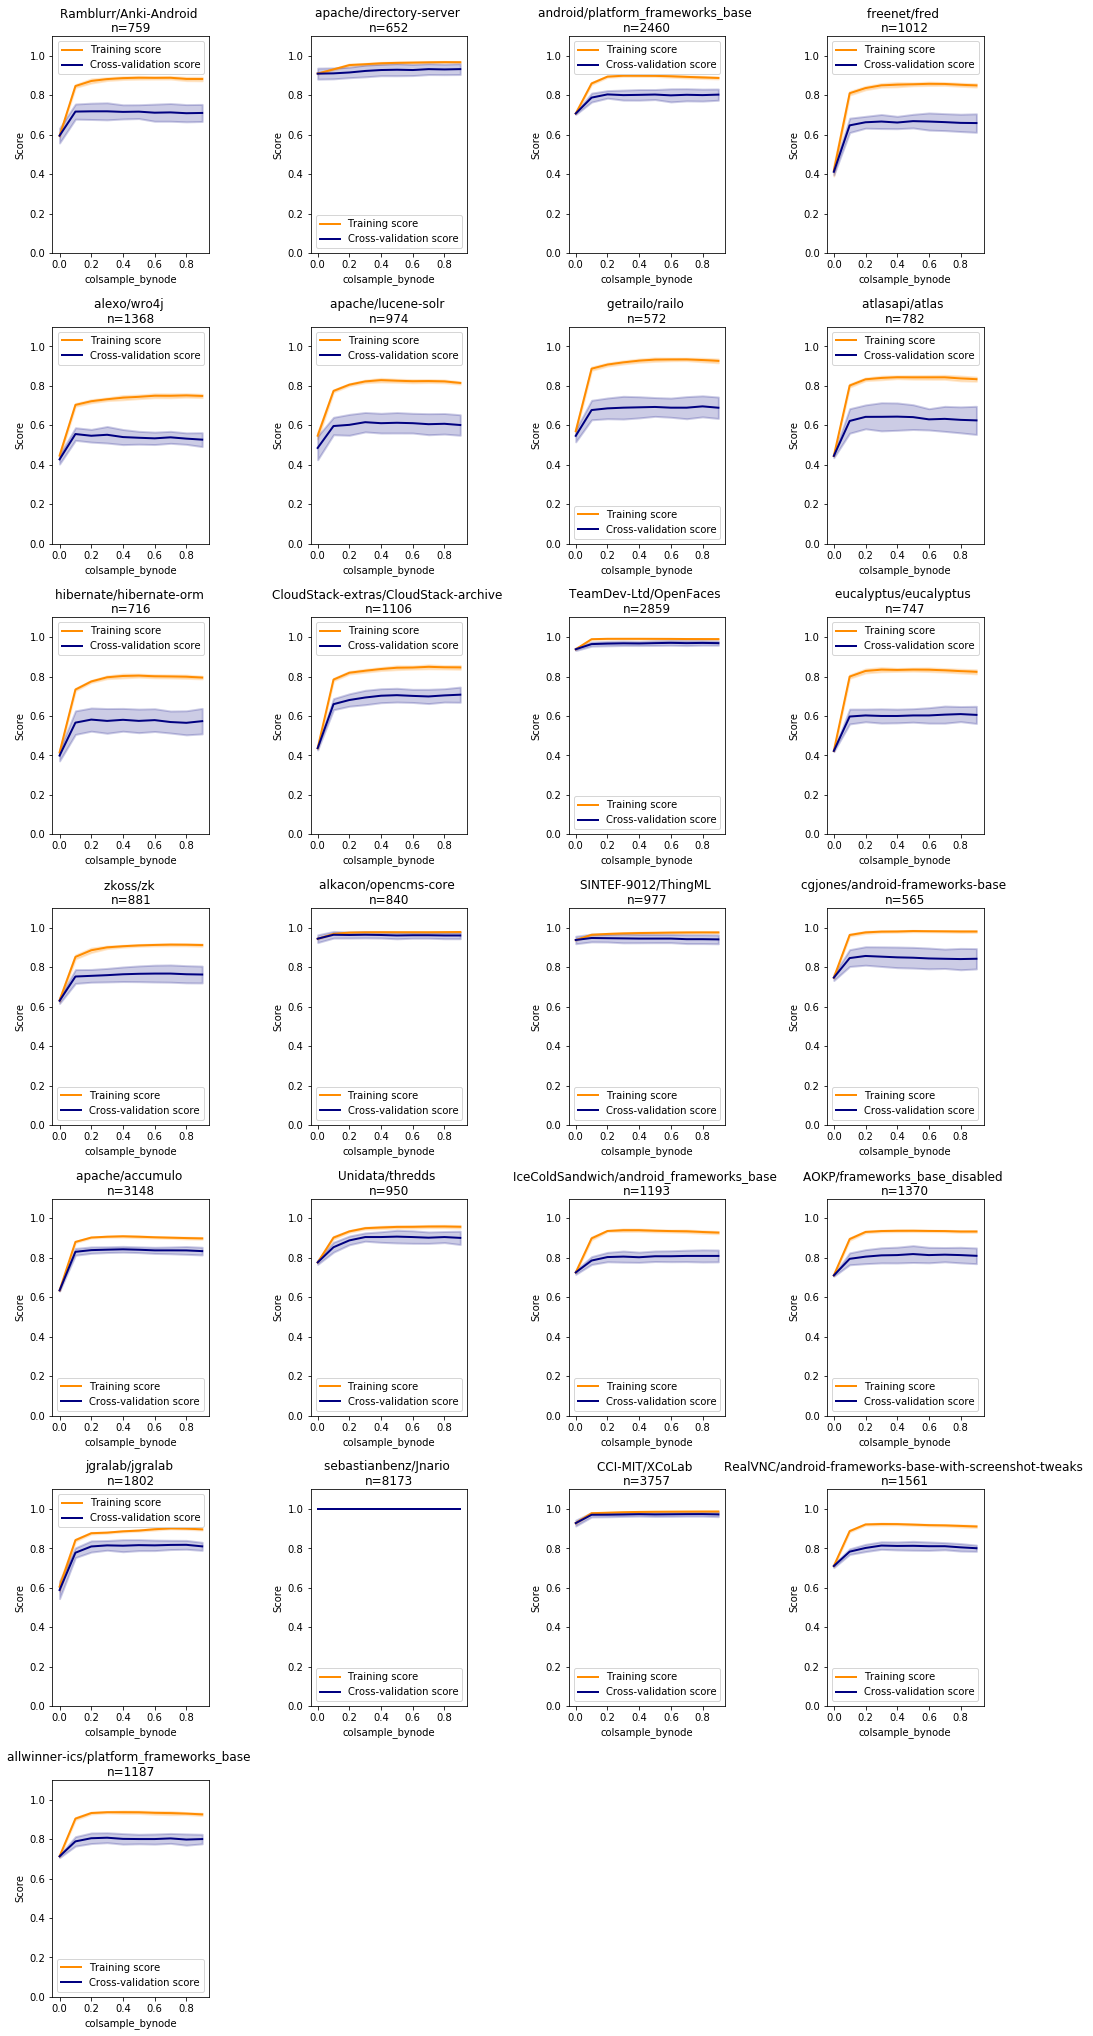

In [13]:
import importlib
importlib.reload(classifier_utils)
classifier_utils.plot_validation_curves(projects, rf_xg, 'colsample_bynode',
                                        np.arange(0,1,0.1),
                                        non_features_columns)

### Tuning hyperparameters


Parameters range to explore, according to the validation curves:
- n_estimators: no visible difference. compare 100 and 400.
- colsample_bynode: after 0.1, no visible difference. compare 0.2 and 0.4




In [14]:
print("Hyperparameters of XGBoost Random Forest:")
rf_xg.get_params()

Hyperparameters of XGBoost Random Forest:


{'colsample_bynode': 0.8,
 'learning_rate': 1,
 'reg_lambda': 1e-05,
 'subsample': 0.9,
 'use_label_encoder': True,
 'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 99,
 'reg_alpha': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eval_metric': 'mlogloss'}

In [25]:
parameters = {'n_estimators':[100,400],
              'colsample_bynode':[0.2,0.4]
             }

In [40]:
results = classifier_utils.grid_search_all(projects, rf_xg, parameters, non_features_columns)

### Ranking combinations by medals

In [41]:
results.sort_values(['gold_medals', 'silver_medals', 'bronze_medals', 'total_medals'], ascending=False)

,min_samples_leaf,max_depth,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
0,40,NaN,0.731228,22,21,0,1,1.64
3,40,12.0,0.731228,22,21,0,1,1.64
8,80,NaN,0.715835,10,6,0,4,4.64
11,80,12.0,0.715835,10,6,0,4,4.64
4,60,NaN,0.720482,11,5,0,6,4.32
7,60,12.0,0.720482,11,5,0,6,4.32
2,40,4.0,0.717287,10,5,0,5,5.08
10,80,4.0,0.710410,8,5,0,3,5.68
6,60,4.0,0.714258,6,5,0,1,5.48
1,40,2.0,0.694981,4,4,0,0,8.36


### Ranking combinations by mean rank

In [42]:
results.sort_values(['mean_rank'])

,min_samples_leaf,max_depth,mean_accuracy,total_medals,gold_medals,silver_medals,bronze_medals,mean_rank
0,40,NaN,0.731228,22,21,0,1,1.64
3,40,12.0,0.731228,22,21,0,1,1.64
4,60,NaN,0.720482,11,5,0,6,4.32
7,60,12.0,0.720482,11,5,0,6,4.32
8,80,NaN,0.715835,10,6,0,4,4.64
11,80,12.0,0.715835,10,6,0,4,4.64
2,40,4.0,0.717287,10,5,0,5,5.08
6,60,4.0,0.714258,6,5,0,1,5.48
10,80,4.0,0.710410,8,5,0,3,5.68
9,80,2.0,0.693479,4,4,0,0,7.96


## Comparing the models with the best parameters with the base model

In [28]:
base_model = rf_xg
model_1 = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss', n_estimators=400, colsample_bynode=0.4)
model_2 = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss', n_estimators=100, colsample_bynode=0.4)
model_3 = XGBRFClassifier(random_state=99, subsample=0.9, eval_metric='mlogloss', n_estimators=400, colsample_bynode=0.2)

In [29]:
models = [base_model, model_1, model_2, model_3]
models_names = ['base', 'model1', 'model2', 'model3']
import importlib
importlib.reload(classifier_utils)
comparison = classifier_utils.compare_models(models, models_names, projects, non_features_columns)

In [30]:
comparison.filter(regex=("model|accuracy|precision|recall")).sort_values(['accuracy'], ascending=False)

,accuracy,model,precision,recall
1,0.79052,model1,0.77996,0.79052
2,0.78940,model2,0.77888,0.78940
0,0.78748,base,0.77912,0.78748
3,0.78736,model3,0.77420,0.78736
